<a href="https://colab.research.google.com/github/Xw-Jia/2019_SaveYourself_GetOffer/blob/master/3_5_news_multi_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
新闻是46个主题，所以标签0-45
'''
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data),len(test_data))

train_data[0]

8982 2246


[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [3]:
'''
将索引解码为新闻文本
'''
word_index = reuters.get_word_index()
reverse_word_index = dict([
    (value,key) for key,value in word_index.items()
])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [0]:
'''
编码数据，数据预处理
'''
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


In [0]:
'''
标签列表 转化为 one-hot编码
当然，也可以跟3.4一样，用numpy转成整数张量
'''
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

'''
Keras有个内置的方法，可以直接调用
'''
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [6]:
'''
构建网络
'''
#由于Dense每一层只能访问上一层的信息，如果丢失信息，就再也找不到了。所以，分类更多的 话，隐藏层的单元个数要更多，也就是NN变得更宽

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 这样的多分类，最好的损失函数是：categorical_crossentropy（分类交叉熵）---> 用于衡量两个概率分布之间的距离（网络输出的概率分布和真实标签的概率分布）
'''
模型编译
'''
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
'''
留出验证集
'''
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]
'''
训练模型
'''
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                   )

In [9]:
'''
history对象有一个history成员，它是一个字典，包含有训练过程中的所有数据
'''
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

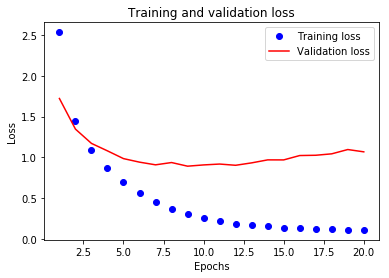

In [10]:
'''
绘制 训练损失，和验证损失
'''
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

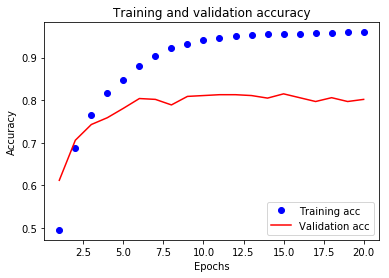

In [11]:
'''
绘制 训练精度 和 验证精度
'''
plt.clf()  #清空图像
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

可以看到，在第9轮开始过拟合，所以，重新训练一个9轮的

In [13]:
history = model.fit(x_train,
                   one_hot_train_labels,
                   epochs=9,
                   batch_size=512,
                   )

Epoch 1/9
8982/8982 [==============================] - 1s 110us/step - loss: 0.2079 - acc: 0.9428
Epoch 2/9
8982/8982 [==============================] - 1s 115us/step - loss: 0.1677 - acc: 0.9470
Epoch 3/9
8982/8982 [==============================] - 1s 135us/step - loss: 0.1477 - acc: 0.9500
Epoch 4/9
8982/8982 [==============================] - 1s 136us/step - loss: 0.1352 - acc: 0.9525
Epoch 5/9
8982/8982 [==============================] - 1s 135us/step - loss: 0.1271 - acc: 0.9534
Epoch 6/9
8982/8982 [==============================] - 1s 136us/step - loss: 0.1226 - acc: 0.9544
Epoch 7/9
8982/8982 [==============================] - 1s 136us/step - loss: 0.1146 - acc: 0.9547
Epoch 8/9
8982/8982 [==============================] - 1s 136us/step - loss: 0.1136 - acc: 0.9547
Epoch 9/9
8982/8982 [==============================] - 1s 135us/step - loss: 0.1124 - acc: 0.9550


In [14]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 103us/step


In [15]:
results

[1.3245905180223692, 0.7773820124931454]

In [17]:
'''
测试一下随机的会有多少准确率
'''
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19723953695458593

In [18]:
'''
预测test
'''
prediction = model.predict(x_test)
prediction[0].shape

(46,)

In [19]:
np.sum(prediction[0])

0.99999994

In [20]:
np.argmax(prediction[0])

4

In [0]:
'''
前面提到了，
labels可以自己写一个one-hot的转换函数，
也可以使用keras自带的接口，
还可以使用numpy转化为整数tensor
'''
y_train = np.array(train_labels)
y_test = np.array(test_labels)
'''
但是，要注意，此时，损失函数要变成sparse_categorical_crossentropy
也就是，当：labels是分类编码时候，采用categorical_crossentropy
当labels是整数tensor时候，采用sparse_categorical_crossentropy
'''